In [25]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import chisquare
from sklearn import tree
# from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import MLtemplate

In [26]:
df = MLtemplate.import_data("telecom_users.csv")

In [3]:
MLtemplate.data_summary(df,5)

###### Shape ######
(5986, 22)
###### Dimensions ######
2
###### Dtypes ######
Unnamed: 0            int64
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object
###### head ######
   Unnamed: 0  customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0        1869  7010-BRBUU    Male              0     Yes        Yes      72   
1        4528  9688-YGXVR  Female              0      No         No      44   
2        6344  9286-DOJGF  Female  

In [25]:
df.describe()

,Unnamed: 0,SeniorCitizen,tenure,MonthlyCharges
count,5986.000000,5986.000000,5986.000000,5986.000000
mean,3533.561310,0.161377,32.468760,64.802213
std,2035.705666,0.367909,24.516391,30.114702
min,0.000000,0.000000,0.000000,18.250000
25%,1777.250000,0.000000,9.000000,35.650000
50%,3546.500000,0.000000,29.000000,70.400000
75%,5291.750000,0.000000,56.000000,89.900000
max,7042.000000,1.000000,72.000000,118.750000


In [26]:
MLtemplate.missing_values(df)

Unnamed: 0          0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [27]:
df = MLtemplate.drop_rows(df,"TotalCharges", " ")

In [5]:
df["TotalCharges"].value_counts()

20.2       10
19.75       8
19.55       7
19.9        6
20.05       6
           ..
2908.2      1
4138.9      1
391.7       1
209.1       1
1612.75     1
Name: TotalCharges, Length: 5610, dtype: int64

In [28]:
df["TotalCharges"] = MLtemplate.change_type(df,"TotalCharges","float64")

Male      3044
Female    2932
Name: gender, dtype: int64


C:\Users\Administrator\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


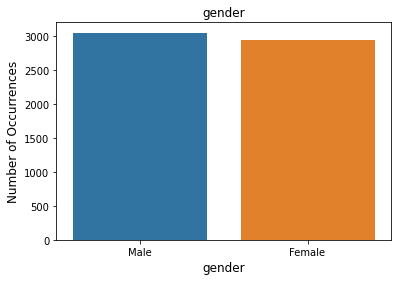

No     3080
Yes    2896
Name: Partner, dtype: int64


C:\Users\Administrator\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


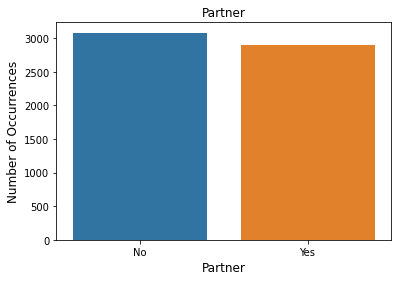

No     4195
Yes    1781
Name: Dependents, dtype: int64


C:\Users\Administrator\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


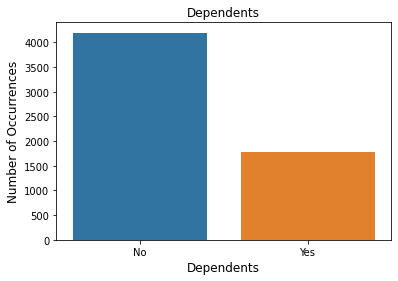

Yes    5388
No      588
Name: PhoneService, dtype: int64


C:\Users\Administrator\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


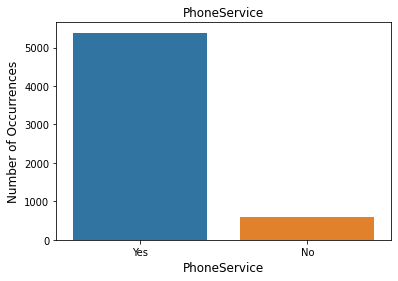

No                  2843
Yes                 2545
No phone service     588
Name: MultipleLines, dtype: int64


C:\Users\Administrator\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


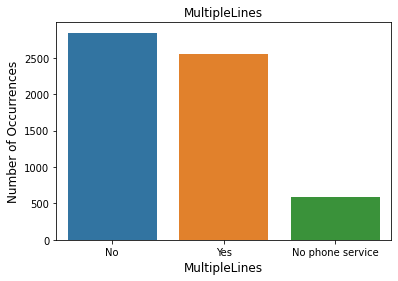

Fiber optic    2627
DSL            2064
No             1285
Name: InternetService, dtype: int64


C:\Users\Administrator\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


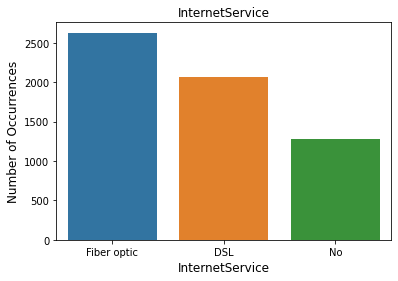

No                     2982
Yes                    1709
No internet service    1285
Name: OnlineSecurity, dtype: int64


C:\Users\Administrator\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


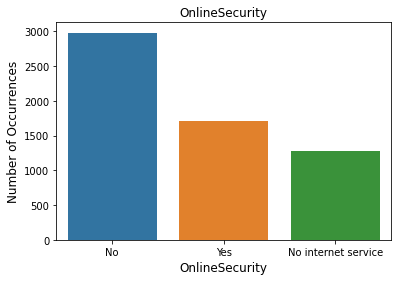

No                     2604
Yes                    2087
No internet service    1285
Name: OnlineBackup, dtype: int64


C:\Users\Administrator\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


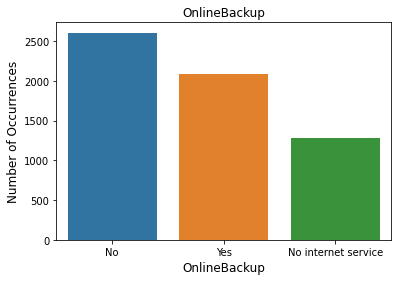

No                     2639
Yes                    2052
No internet service    1285
Name: DeviceProtection, dtype: int64


C:\Users\Administrator\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


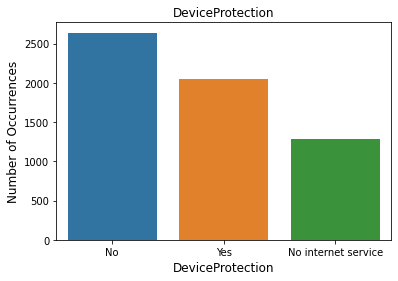

No                     2959
Yes                    1732
No internet service    1285
Name: TechSupport, dtype: int64


C:\Users\Administrator\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


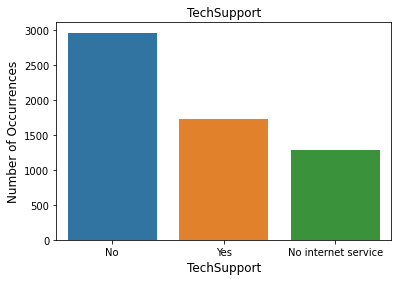

No                     2388
Yes                    2303
No internet service    1285
Name: StreamingTV, dtype: int64


C:\Users\Administrator\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


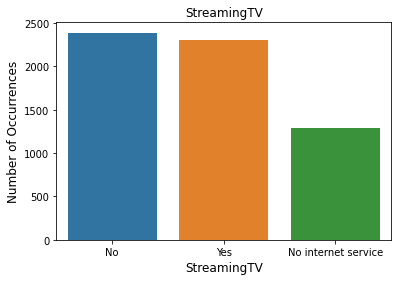

No                     2353
Yes                    2338
No internet service    1285
Name: StreamingMovies, dtype: int64


C:\Users\Administrator\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


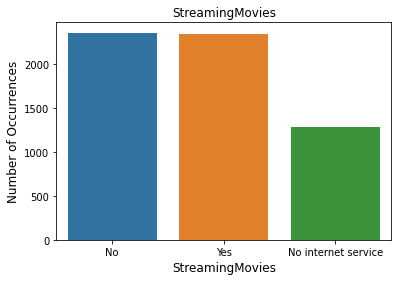

Month-to-month    3269
Two year          1432
One year          1275
Name: Contract, dtype: int64


C:\Users\Administrator\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


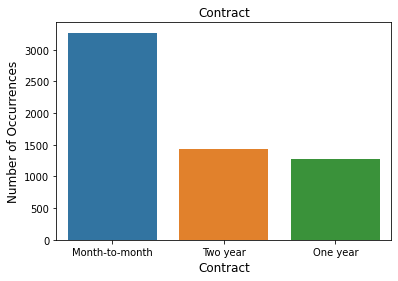

Yes    3525
No     2451
Name: PaperlessBilling, dtype: int64


C:\Users\Administrator\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


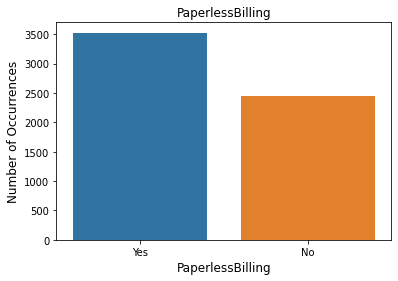

Electronic check             2006
Mailed check                 1362
Bank transfer (automatic)    1306
Credit card (automatic)      1302
Name: PaymentMethod, dtype: int64


C:\Users\Administrator\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


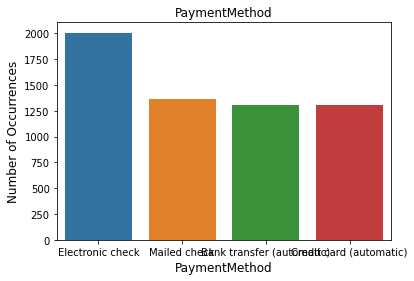

No     4389
Yes    1587
Name: Churn, dtype: int64


C:\Users\Administrator\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


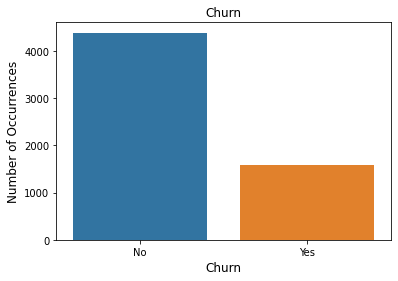

In [29]:

categ_columns = [i for i in df.dtypes.index if df.dtypes[i] == 'O']
# categ_columns[1:]
MLtemplate.categ_analysis(df, categ_columns[1:])

In [49]:
df["Churn"].value_counts()


No     4399
Yes    1587
Name: Churn, dtype: int64

In [17]:

df["TotalCharges"].value_counts()


20.2       10
           10
19.75       8
19.55       7
20.05       6
           ..
5013        1
52.05       1
953.45      1
1411.35     1
1686.15     1
Name: TotalCharges, Length: 5611, dtype: int64

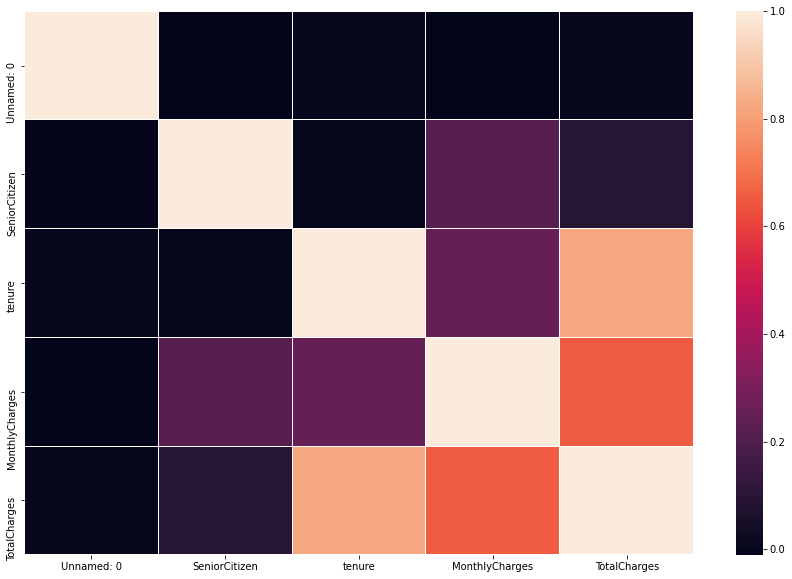

In [66]:
MLtemplate.corr_heatmap(df)

In [67]:
df.describe()

,Unnamed: 0,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5976.000000,5976.000000,5976.000000,5976.000000,5976.000000
mean,3534.770750,0.161647,32.523092,64.846687,2298.060617
std,2035.409858,0.368157,24.500858,30.107576,2274.127165
min,0.000000,0.000000,1.000000,18.250000,18.800000
25%,1779.750000,0.000000,9.000000,35.750000,404.312500
50%,3548.000000,0.000000,29.000000,70.425000,1412.150000
75%,5293.500000,0.000000,56.000000,89.900000,3846.962500
max,7042.000000,1.000000,72.000000,118.750000,8684.800000


       MonthlyCharges  TotalCharges
count     5976.000000   5976.000000
mean        64.846687   2298.060617
std         30.107576   2274.127165
min         18.250000     18.800000
25%         35.750000    404.312500
50%         70.425000   1412.150000
75%         89.900000   3846.962500
max        118.750000   8684.800000
####### histogram ########


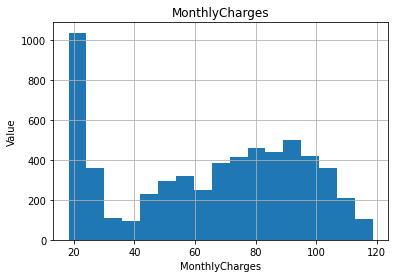

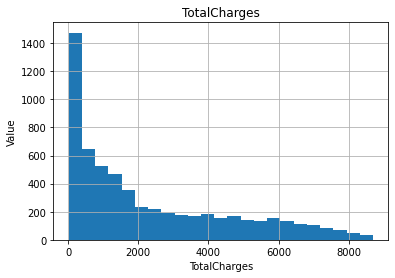

####### histogram ########


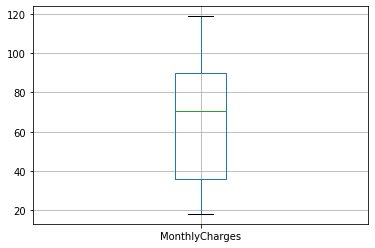

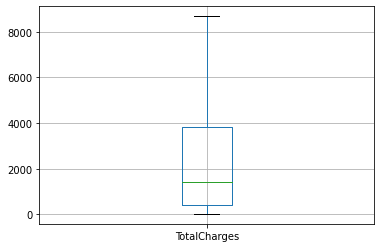

####### QQPLOT ########


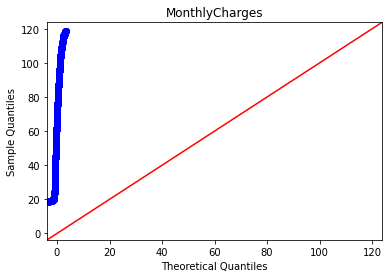

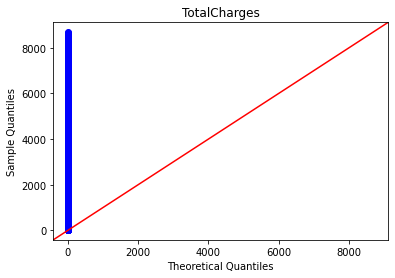

########Test for Normality#########
MonthlyCharges --> p value = 0.0
TotalCharges --> p value = 0.0


In [55]:
MLtemplate.numerical_analysis(df,[ "MonthlyCharges", "TotalCharges"])

In [30]:
chrundf2 =MLtemplate.deep_copy(df)


In [31]:
df = df.loc[:, df.columns != 'Churn']
df = MLtemplate.drop_columns(df,["Unnamed: 0", "customerID"])

In [10]:
df = pd.get_dummies(df)
df.head(5)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,72,24.10,1734.65,0,1,0,1,0,1,...,0,0,0,1,1,0,0,1,0,0
1,0,44,88.15,3973.20,1,0,1,0,1,0,...,0,1,0,0,0,1,0,1,0,0
2,1,38,74.95,2869.85,1,0,0,1,1,0,...,0,1,0,0,0,1,1,0,0,0
3,0,4,55.90,238.50,0,1,1,0,1,0,...,1,1,0,0,0,1,0,0,1,0
4,0,2,53.45,119.50,0,1,1,0,1,0,...,0,1,0,0,1,0,0,0,1,0


In [11]:
df.dtypes

SeniorCitizen                                int64
tenure                                       int64
MonthlyCharges                             float64
TotalCharges                               float64
gender_Female                                uint8
gender_Male                                  uint8
Partner_No                                   uint8
Partner_Yes                                  uint8
Dependents_No                                uint8
Dependents_Yes                               uint8
PhoneService_No                              uint8
PhoneService_Yes                             uint8
MultipleLines_No                             uint8
MultipleLines_No phone service               uint8
MultipleLines_Yes                            uint8
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No                           uint8
OnlineSecurity_No                            uint8
OnlineSecurity_No internet serv

In [20]:
y = chrundf2['Churn'].copy()
y.value_counts()
y = y.replace({"No" : 0, "Yes" : 1})
y.value_counts()

0    4389
1    1587
Name: Churn, dtype: int64

In [13]:
print(type(y))
print(type(X))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [24]:
MLtemplate.predict_model(df,"KNN","classification", X, y,6)

####### confusion matrix ########
[[804  75]
 [190 127]]
######## confusion report #########
              precision    recall  f1-score   support

           0       0.81      0.91      0.86       879
           1       0.63      0.40      0.49       317

    accuracy                           0.78      1196
   macro avg       0.72      0.66      0.67      1196
weighted avg       0.76      0.78      0.76      1196

###### log loss ###########
######### AUC ########
0.6576533413722936
